## Sequential Backward Floating Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Backward Floating Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features=1,
                                                     forward=False,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   22.8s finished

[2022-11-03 01:40:50] Features: 21/1 -- score: 0.8476141132973336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   25.5s finished

[2022-11-03 01:41:16] Features: 20/1 -- score: 0.8549119869956208[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished

[2022-11-03 01:46:01] Features: 11/1 -- score: 0.8601002360352481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    9.3s finished

[2022-11-03 01:46:19] Features: 10/1 -- score: 0.8550604199869059[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.1s finished

[2022-11-03 01:51:30] Features: 6/1 -- score: 0.8733455979807161[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   12.8s finished

[2022-11-03 01:51:48] Features: 5/1 -- score: 0.8692135030619437[Parallel(n_jobs=1)]: Using

In [16]:
forward_feature_selection.k_feature_idx_

(10,)

In [17]:
forward_feature_selection.k_feature_names_

('total_score',)

In [18]:
forward_feature_selection.k_score_

0.8456042734185905

In [19]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("backwardfloating.randomforest.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.832618025751073, 0.8398268398268399, 0.8347...",0.838288,"(id_student, gender, region, highest_education...",0.008714,0.00678,0.00339
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...","[0.8534482758620691, 0.8333333333333334, 0.849...",0.847614,"(id_student, gender, region, highest_education...",0.00938,0.007298,0.003649
20,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8744588744588744, 0.8310502283105021, 0.837...",0.854912,"(id_student, gender, region, highest_education...",0.022691,0.017654,0.008827
19,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8508771929824561, 0.8401826484018265, 0.848...",0.852534,"(id_student, gender, region, highest_education...",0.013639,0.010612,0.005306
18,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 14, 15, 1...","[0.8571428571428571, 0.8370044052863438, 0.848...",0.849168,"(id_student, gender, region, highest_education...",0.010844,0.008437,0.004219
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16...","[0.8384279475982532, 0.8634361233480177, 0.836...",0.849502,"(id_student, gender, region, highest_education...",0.021984,0.017104,0.008552
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 15, 16, 17...","[0.8584070796460177, 0.8622222222222222, 0.834...",0.854907,"(id_student, gender, region, highest_education...",0.015362,0.011952,0.005976
15,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 14, 15, 16, 17, 1...","[0.8596491228070174, 0.8421052631578947, 0.839...",0.852693,"(id_student, gender, region, highest_education...",0.01338,0.01041,0.005205
14,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 16, 17, 19, 21)","[0.8558951965065502, 0.8584070796460177, 0.838...",0.851672,"(id_student, gender, region, highest_education...",0.009596,0.007466,0.003733
13,"(0, 1, 3, 4, 5, 6, 8, 10, 15, 16, 17, 19, 21)","[0.8634361233480177, 0.8558558558558559, 0.829...",0.855617,"(id_student, gender, highest_education, imd_ba...",0.017885,0.013915,0.006958


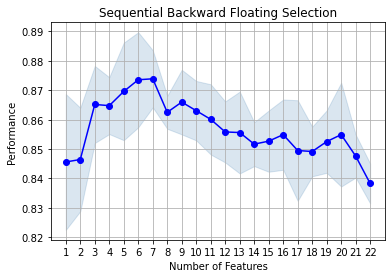

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Floating Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= (1,22),
                                                     forward=False,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   20.9s finished

[2022-11-03 01:53:50] Features: 21/1 -- score: 0.8522666610714108[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   19.2s finished

[2022-11-03 01:54:09] Features: 20/1 -- score: 0.8478903128548672[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   11.7s finished

[2022-11-03 01:59:00] Features: 6/1 -- score: 0.8642330547693273[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

In [22]:
forward_feature_selection.k_feature_names_

('disability', 'total_score', 'ouelluminate', 'resource', 'subpage', 'url')

In [23]:
forward_feature_selection.k_score_

0.8795853378814851

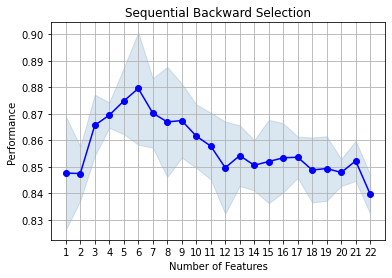

In [24]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()